### Task 2: TSF
#### Anupam Prakash

In [60]:
# Importing all necessary libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
#READING DATA
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head() #display fisrt five rows of data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Visualization of Sample data

In [62]:
#to get information about Attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [63]:
#to get short summary of numerical data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


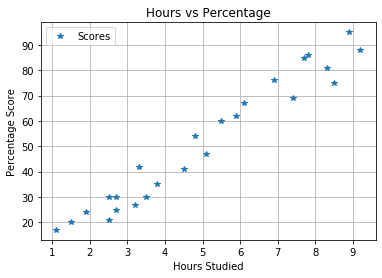

In [64]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='*',grid=True)  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

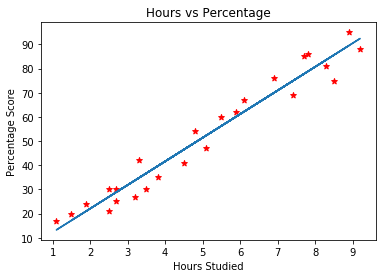

In [65]:
# Plotting the Scatter plot and Regression line

m, b = np.polyfit(data['Hours'],data['Scores'], 1) #here m is slope
plt.scatter(data['Hours'],data['Scores'],c='red', marker='*')  # we can also do it by saving variable Hours in X variable first
plt.plot(data['Hours'], m*data['Hours']+ b)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### Spliting sample data into Inputs and Outputs

In [75]:
#Splitting into Input and Output
X = data.iloc[:, :-1].values  #input data (Hours)
y = data.iloc[:, 1].values #output data based on input data (Percentage) 
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


### Spliting data in Train and test

In [67]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=0) 

In [68]:
print('Train input contains',X_train.shape, end=" Rows and columns")
print()
print('Test input contains', X_test.shape, end=" Rows and columns")
print()
print('Train Output Contains',y_train.shape, end=" Rows and columns") 
print()
print('Test Output Contains',y_test.shape, end=" Rows and columns")

Train input contains (17, 1) Rows and columns
Test input contains (8, 1) Rows and columns
Train Output Contains (17,) Rows and columns
Test Output Contains (8,) Rows and columns

### Applying Algorithms 

In [69]:
from sklearn.linear_model import LinearRegression  
regr = LinearRegression()  
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
#printing Score
print('Score is', regr.score(X_test, y_test)*100,'%')

Score is 95.68211104435257 %


### Predicting on Test data

In [71]:
print(X_test) # Testing data - In Hours
prediction = regr.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [72]:
#to compare the actual and predicted percentage 
data_predict= pd.DataFrame({'Actual': y_test, 'Predicted': prediction})  
print(data_predict)

   Actual  Predicted
0      20  17.053665
1      27  33.694229
2      69  74.806209
3      30  26.842232
4      62  60.123359
5      35  39.567369
6      24  20.969092
7      86  78.721636


## Testing model on User's data

In [73]:
user_data=[float(input('Enter the total Hour to Predict Percentage: '))]
df=pd.DataFrame(user_data)
user_predict=regr.predict(df)
print('The Predicted pecentage is: ',user_predict)


Enter the total Hour to Predict Percentage: 6.5
The Predicted pecentage is:  [65.99649885]


### Model Accuracy

In [74]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, prediction)) 
print()
print('Accuracy is', regr.score(X_test, y_test)*100,'%')

Mean Absolute Error: 4.419727808027652

Accuracy is 95.68211104435257 %
